In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

In [2]:
fb_data = pd.read_csv('Facebook_Marketplace_data.csv',index_col= 'status_id')
fb_data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
train_data = fb_data.drop(columns=['Column1','Column2','Column3','Column4','status_published'])

In [4]:
(train_data.num_reactions == train_data.num_likes + train_data.num_loves + train_data.num_wows + train_data.num_hahas + train_data.num_sads).count()

7050

As we can see from above reactions is just the sum of likes + loves + wows + hahas + sads in the dataset

<AxesSubplot: xlabel='num_reactions', ylabel='num_comments'>

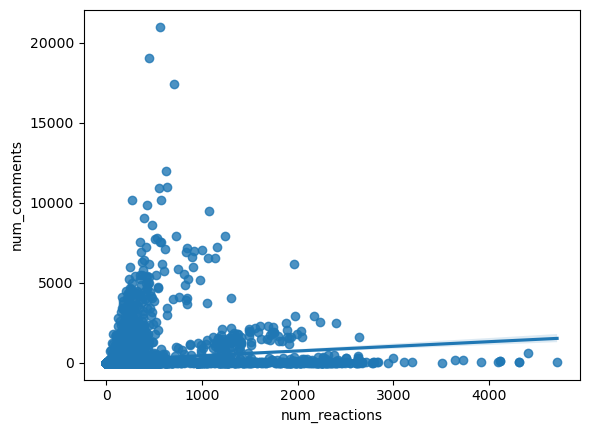

In [5]:
sns.regplot(x= 'num_reactions', y = 'num_comments',data = train_data)


In [6]:
# sns.jointplot(x= 'num_reactions', y = 'num_comments',data = train_data,kind ='kde',fill = True)

As we can see there is no strong corelation but we can say there is a pattern if num_reacctions is close to 0 then there is high number of commnets on it 

<AxesSubplot: xlabel='num_reactions', ylabel='num_shares'>

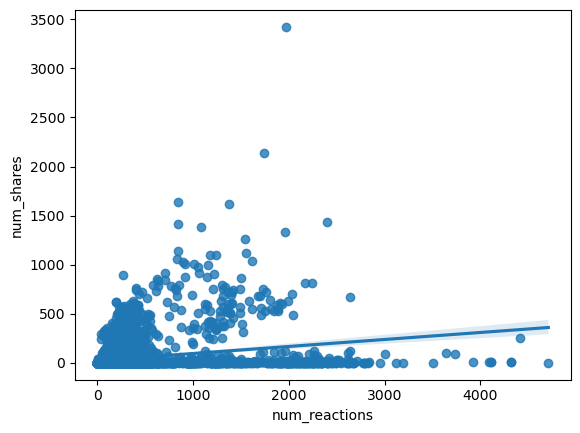

In [7]:
sns.regplot(x= 'num_reactions', y = 'num_shares',data = train_data)


  
## OneHotEncoding

In [8]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
encoded_cols = pd.DataFrame(OH_encoder.fit_transform(train_data[['status_type']]))
encoded_cols.index = train_data.index
train_data.drop(columns=['status_type'],inplace=True)
train_data = pd.concat([train_data,encoded_cols],axis = 1)
train_data.columns = train_data.columns.astype('str')

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data.iloc[:,:9] = sc.fit_transform(train_data.iloc[:,:9])
train_data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,0,1,2,3
status_id,,,,,,,,,,,,,
1,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0.0,0.0,0.0,1.0
2,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.0,1.0,0.0,0.0
3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0.0,0.0,0.0,1.0
4,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.0,1.0,0.0,0.0
5,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.0,1.0,0.0,0.0
7047,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748,0.0,1.0,0.0,0.0
7048,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748,0.0,1.0,0.0,0.0


## Getting the Optimal cluster Number BY Elbow Method

<AxesSubplot: title={'center': 'WCSS vs No_of_Clusters'}, xlabel='No_of_Clusters', ylabel='WCSS'>

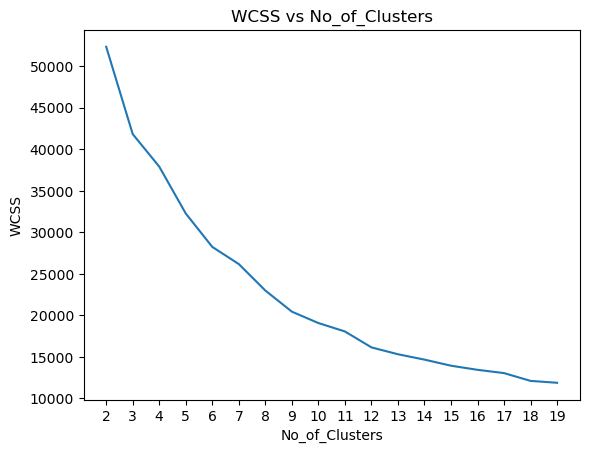

In [10]:
from sklearn.cluster import KMeans

def get_WCSS(n_clusters):
    model = KMeans(n_clusters=n_clusters,init='k-means++',random_state=37)
    model.fit(train_data)
    return model.inertia_
plt.title('WCSS vs No_of_Clusters')
plt.xlabel('No_of_Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2,20))
sns.lineplot(y=[get_WCSS(i) for i in range(2,20)],x =[i for i in range(2,20)])


As we can see from elbow method we get optimal value as 12 or 9 for cluster number

In [19]:
optimal_cluster = 12
model = KMeans(n_clusters=optimal_cluster,init='k-means++',random_state=37)
model.fit(train_data)
labels = model.predict(train_data)
labels = pd.Series(labels,index=fb_data.index)
pred_data = fb_data.copy()
pred_data['cluster'] = labels
pred_data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
status_id,,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,2
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,11
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,0
7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,0
7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0


In [20]:
pred_data.groupby('cluster').aggregate({
    'num_reactions':'mean',
    'num_shares':'mean',
    'num_comments':'mean'})

,num_reactions,num_shares,num_comments
cluster,,,
0,78.607485,1.481404,11.117661
1,2293.089109,13.653465,66.524752
2,261.147351,224.056291,977.814570
3,1235.962025,717.265823,2814.240506
4,1551.434783,830.652174,1606.782609
5,401.875000,367.943182,5808.579545
6,750.000000,178.250000,512.000000
7,1389.833333,419.333333,1210.500000
8,225.400000,2.600000,28.800000
